In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r Ireland_2020

In [5]:
Ireland_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
6,6,MR Adair (IRE),4,3,0,45,29,15.00,69,65.21,...,134,2,1/45,67.00,7.11,56.5,0,0,2,0
25,25,A Balbirnie (IRE),6,6,0,228,113,38.00,264,86.36,...,-,-,-,-,-,-,-,-,3,0
41,41,C Campher (IRE),3,2,1,127,68,127.00,205,61.95,...,144,5,2/50,28.80,6.69,25.8,0,0,1,0
58,58,GJ Delany (IRE),5,5,0,67,22,13.40,100,67.00,...,74,1,1/29,74.00,7.40,60.0,0,0,1,0
123,123,JB Little (IRE),2,-,-,-,-,-,-,-,...,122,5,3/60,24.40,6.47,22.6,0,0,0,0
124,124,AR McBrine (IRE),6,5,1,101,40,25.25,129,78.29,...,268,6,2/37,44.66,5.58,48.0,0,0,0,0
136,136,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,71.92,...,126,4,2/28,31.50,5.36,35.2,0,0,2,0
137,137,JA McCollum (IRE),1,1,0,20,20,20.00,29,68.96,...,-,-,-,-,-,-,-,-,0,0
168,168,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,87.17,...,-,-,-,-,-,-,-,-,1,0
184,184,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,55.10,...,-,-,-,-,-,-,-,-,1,0


In [6]:
Ireland_2020=Ireland_2020.reset_index()

In [7]:
Ireland_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,6,6,MR Adair (IRE),4,3,0,45,29,15.00,69,...,134,2,1/45,67.00,7.11,56.5,0,0,2,0
1,25,25,A Balbirnie (IRE),6,6,0,228,113,38.00,264,...,-,-,-,-,-,-,-,-,3,0
2,41,41,C Campher (IRE),3,2,1,127,68,127.00,205,...,144,5,2/50,28.80,6.69,25.8,0,0,1,0
3,58,58,GJ Delany (IRE),5,5,0,67,22,13.40,100,...,74,1,1/29,74.00,7.40,60.0,0,0,1,0
4,123,123,JB Little (IRE),2,-,-,-,-,-,-,...,122,5,3/60,24.40,6.47,22.6,0,0,0,0
5,124,124,AR McBrine (IRE),6,5,1,101,40,25.25,129,...,268,6,2/37,44.66,5.58,48.0,0,0,0,0
6,136,136,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,...,126,4,2/28,31.50,5.36,35.2,0,0,2,0
7,137,137,JA McCollum (IRE),1,1,0,20,20,20.00,29,...,-,-,-,-,-,-,-,-,0,0
8,168,168,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,...,-,-,-,-,-,-,-,-,1,0
9,184,184,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,...,-,-,-,-,-,-,-,-,1,0


In [8]:
Ireland_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
Ireland_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),4,3,0,45,29,15.00,69,65.21,0,...,134,2,1/45,67.00,7.11,56.5,0,0,2,0
1,A Balbirnie (IRE),6,6,0,228,113,38.00,264,86.36,1,...,-,-,-,-,-,-,-,-,3,0
2,C Campher (IRE),3,2,1,127,68,127.00,205,61.95,0,...,144,5,2/50,28.80,6.69,25.8,0,0,1,0
3,GJ Delany (IRE),5,5,0,67,22,13.40,100,67.00,0,...,74,1,1/29,74.00,7.40,60.0,0,0,1,0
4,JB Little (IRE),2,-,-,-,-,-,-,-,-,...,122,5,3/60,24.40,6.47,22.6,0,0,0,0
5,AR McBrine (IRE),6,5,1,101,40,25.25,129,78.29,0,...,268,6,2/37,44.66,5.58,48.0,0,0,0,0
6,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,71.92,0,...,126,4,2/28,31.50,5.36,35.2,0,0,2,0
7,JA McCollum (IRE),1,1,0,20,20,20.00,29,68.96,0,...,-,-,-,-,-,-,-,-,0,0
8,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,87.17,0,...,-,-,-,-,-,-,-,-,1,0
9,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,55.10,0,...,-,-,-,-,-,-,-,-,1,0


In [10]:
Ireland_2020_players =Ireland_2020.copy()

In [11]:
Ireland_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
Ireland_2020_players.HS=Ireland_2020_players.HS.str.extract('(\d+)')
Ireland_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
Ireland_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,4,3,0,45,29,15.00,69,65.21,0,0,...,134,2,1/45,67.00,7.11,56.5,0,0,2,0
1,6,6,0,228,113,38.00,264,86.36,1,1,...,-,-,-,-,-,-,-,-,3,0
2,3,2,1,127,68,127.00,205,61.95,0,2,...,144,5,2/50,28.80,6.69,25.8,0,0,1,0
3,5,5,0,67,22,13.40,100,67.00,0,0,...,74,1,1/29,74.00,7.40,60.0,0,0,1,0
4,2,-,-,-,0,-,-,-,-,-,...,122,5,3/60,24.40,6.47,22.6,0,0,0,0
5,6,5,1,101,40,25.25,129,78.29,0,0,...,268,6,2/37,44.66,5.58,48.0,0,0,0,0
6,4,4,1,41,17,13.66,57,71.92,0,0,...,126,4,2/28,31.50,5.36,35.2,0,0,2,0
7,1,1,0,20,20,20.00,29,68.96,0,0,...,-,-,-,-,-,-,-,-,0,0
8,6,6,1,102,31,20.40,117,87.17,0,0,...,-,-,-,-,-,-,-,-,1,0
9,3,3,0,54,29,18.00,98,55.10,0,0,...,-,-,-,-,-,-,-,-,1,0


In [14]:
Ireland_2020_players.replace("-",0,inplace=True)

In [15]:
Ireland_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

Ireland_2020_players_scaled = pd.DataFrame(scaler.fit_transform(Ireland_2020_players),columns=Ireland_2020_players.columns)
Ireland_2020_players_scaled.shape
Ireland_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.077382,-0.383436,-0.816497,-0.502102,-0.275187,-0.348661,-0.517871,0.067190,-0.377964,-0.447214,...,-0.674200,0.602007,-0.145865,1.879532,1.145363,1.506060,0.0,0.0,0.072023,0.0
1,1.160735,1.289739,-0.816497,2.220405,2.007848,0.460134,2.002813,1.067504,2.645751,1.341641,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,0.456146,0.0
2,-0.696441,-0.941161,0.816497,0.717819,0.784793,3.589822,1.240145,-0.086995,-0.377964,3.130495,...,1.483240,0.717777,1.021055,0.267721,1.005191,0.131777,0.0,0.0,-0.312100,0.0
3,0.541676,0.732014,-0.816497,-0.174806,-0.465440,-0.404925,-0.117147,0.151850,-0.377964,-0.447214,...,-0.674200,-0.092616,-0.534838,2.174890,1.242148,1.662737,0.0,0.0,-0.312100,0.0
4,-1.315499,-2.056611,-0.816497,-1.171571,-1.063378,-0.876137,-1.409806,-3.016992,-0.377964,-0.447214,...,2.561959,0.463082,1.021055,0.082067,0.931768,-0.011471,0.0,0.0,-0.696223,0.0


In [17]:
Ireland_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,1.600000e+01,...,1.600000e+01,16.000000,16.000000,1.600000e+01,1.600000e+01,1.600000e+01,16.0,16.0,1.600000e+01,16.0
mean,3.989864e-17,4.163336e-17,6.938894e-18,-2.081668e-17,-2.775558e-17,2.428613e-17,-1.387779e-17,-2.706169e-16,-3.469447e-17,2.081668e-17,...,6.245005e-17,0.000000,0.000000,-5.204170e-17,1.387779e-16,2.081668e-17,0.0,0.0,-2.775558e-17,0.0
std,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,1.032796e+00,...,1.032796e+00,1.032796,1.032796,1.032796e+00,1.032796e+00,1.032796e+00,0.0,0.0,1.032796e+00,0.0
min,-1.934558e+00,-2.056611e+00,-8.164966e-01,-1.171571e+00,-1.063378e+00,-8.761366e-01,-1.409806e+00,-3.016992e+00,-3.779645e-01,-4.472136e-01,...,-6.741999e-01,-0.949318,-0.923812,-9.474663e-01,-1.227547e+00,-1.023158e+00,0.0,0.0,-6.962228e-01,0.0
25%,-6.964409e-01,-5.228671e-01,-8.164966e-01,-6.322762e-01,-5.401824e-01,-3.980681e-01,-7.246969e-01,-1.668076e-01,-3.779645e-01,-4.472136e-01,...,-6.741999e-01,-0.949318,-0.923812,-9.474663e-01,-1.227547e+00,-1.023158e+00,0.0,0.0,-4.081306e-01,0.0
50%,-7.738232e-02,-1.045734e-01,-8.164966e-01,-2.491912e-01,-2.751872e-01,-2.959137e-01,-1.300738e-01,1.095202e-01,-3.779645e-01,-4.472136e-01,...,-6.741999e-01,-0.162079,-0.340352,8.417703e-02,3.510555e-01,6.015286e-02,0.0,0.0,-3.120999e-01,0.0
75%,1.160735e+00,7.320140e-01,8.164966e-01,3.347344e-01,-9.852383e-02,4.035187e-02,2.189441e-01,5.996265e-01,-3.779645e-01,-4.472136e-01,...,4.045199e-01,0.630949,1.021055,4.018978e-01,9.342707e-01,7.159589e-01,0.0,0.0,7.202305e-02,0.0
max,1.160735e+00,1.289739e+00,2.449490e+00,2.384053e+00,2.796038e+00,3.589822e+00,2.145006e+00,1.105814e+00,2.645751e+00,3.130495e+00,...,2.561959e+00,2.153331,1.799002,2.174890e+00,1.242148e+00,1.662737e+00,0.0,0.0,3.529130e+00,0.0


In [18]:
X =  Ireland_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-0.07738232, -0.3834359 , -0.81649658, -0.50210165, -0.27518725,
        -0.34866124, -0.51787147,  0.0671901 , -0.37796447, -0.4472136 ,
        -0.57735027, -0.81680533,  0.48653363, -1.83440975, -0.07738232,
         0.93933644,  0.27957824, -0.67419986,  0.60200651, -0.14586499,
         1.87953172,  1.14536289,  1.50605966,  0.        ,  0.        ,
         0.07202305,  0.        ],
       [ 1.16073485,  1.28973892, -0.81649658,  2.22040509,  2.00784769,
         0.46013438,  2.00281337,  1.0675037 ,  2.64575131,  1.34164079,
        -0.57735027,  2.60599797,  1.04257207, -1.58489719,  1.16073485,
        -1.06458129, -0.94099933, -0.67419986, -0.94931795, -0.92381161,
        -0.94746627, -1.227547  , -1.02315812,  0.        ,  0.        ,
         0.45614599,  0.        ],
       [-0.69644091, -0.94116084,  0.81649658,  0.7178194 ,  0.78479326,
         3.58982177,  1.24014463, -0.08699536, -0.37796447,  3.13049517,
        -0.57735027,  0.73901435, -0.62554324, -1.3747

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(Ireland_2020_players_scaled))

False

In [23]:
Ireland_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-0.077382,-0.383436,-0.816497,-0.502102,-0.275187,-0.348661,-0.517871,0.067190,-0.377964,-0.447214,...,-0.674200,0.602007,-0.145865,1.879532,1.145363,1.506060,0.0,0.0,0.072023,0.0
1,1.160735,1.289739,-0.816497,2.220405,2.007848,0.460134,2.002813,1.067504,2.645751,1.341641,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,0.456146,0.0
2,-0.696441,-0.941161,0.816497,0.717819,0.784793,3.589822,1.240145,-0.086995,-0.377964,3.130495,...,1.483240,0.717777,1.021055,0.267721,1.005191,0.131777,0.0,0.0,-0.312100,0.0
3,0.541676,0.732014,-0.816497,-0.174806,-0.465440,-0.404925,-0.117147,0.151850,-0.377964,-0.447214,...,-0.674200,-0.092616,-0.534838,2.174890,1.242148,1.662737,0.0,0.0,-0.312100,0.0
4,-1.315499,-2.056611,-0.816497,-1.171571,-1.063378,-0.876137,-1.409806,-3.016992,-0.377964,-0.447214,...,2.561959,0.463082,1.021055,0.082067,0.931768,-0.011471,0.0,0.0,-0.696223,0.0
5,1.160735,0.732014,0.816497,0.331015,0.023782,0.011780,0.257724,0.685824,-0.377964,-0.447214,...,-0.674200,2.153331,1.410028,0.936918,0.634737,1.125558,0.0,0.0,-0.696223,0.0
6,-0.077382,0.174289,0.816497,-0.561610,-0.601335,-0.395782,-0.672991,0.384547,-0.377964,-0.447214,...,1.483240,0.509390,0.632082,0.381645,0.561313,0.552567,0.0,0.0,0.072023,0.0
7,-1.934558,-1.498886,-0.816497,-0.874029,-0.519798,-0.172836,-1.034935,0.244551,-0.377964,-0.447214,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.696223,0.0
8,1.160735,1.289739,0.816497,0.345892,-0.220829,-0.158770,0.102605,1.105814,-0.377964,-0.447214,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.312100,0.0
9,-0.696441,-0.383436,-0.816497,-0.368208,-0.275187,-0.243166,-0.143000,-0.410974,-0.377964,-0.447214,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.312100,0.0


In [24]:
np.all(np.isfinite(Ireland_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


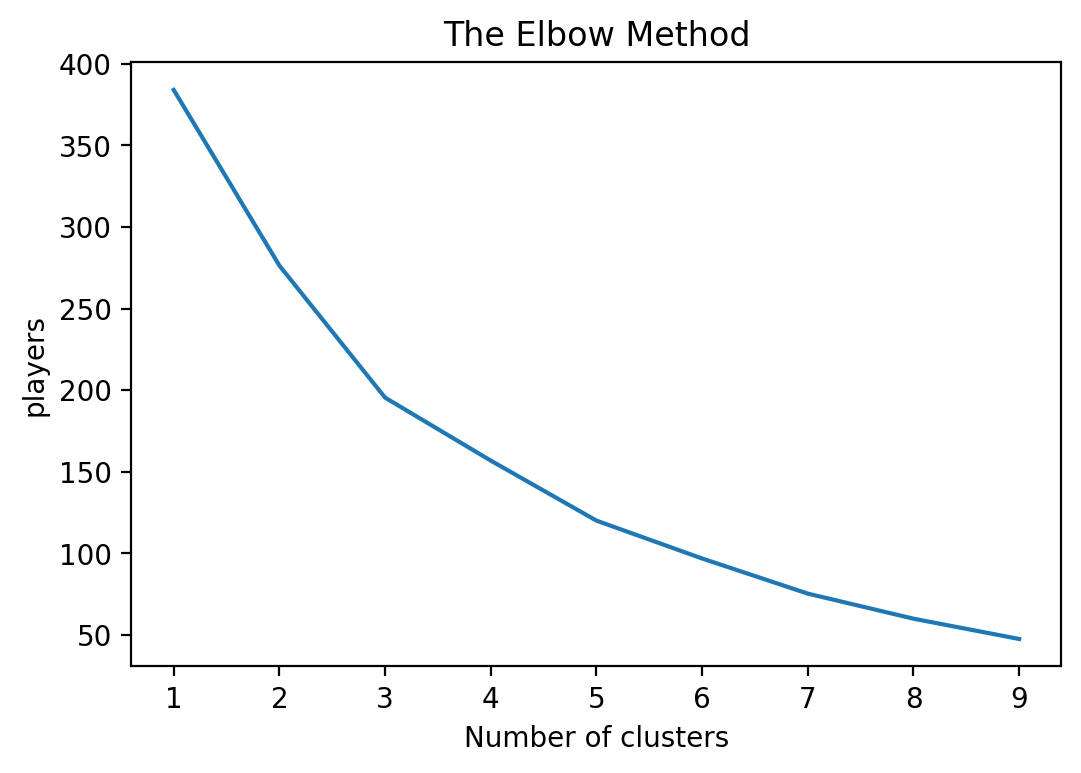

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 1, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 2, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.14616661, -0.25949702,  0.27216553, -0.35994283, -0.36578387,
        -0.0161173 , -0.33689922, -0.29688517, -0.37796447, -0.0496904 ,
        -0.06415003, -0.36734631, -0.25485095, -0.25416356, -0.14616661,
         0.77234329,  0.73115528,  0.52437767,  0.73707207,  0.71852014,
         0.73691821,  0.73226371,  0.79578965,  0.        ,  0.        ,
        -0.35478021,  0.        ],
       [ 1.16073485,  1.28973892, -0.81649658,  2.30222907,  2.40194301,
         0.49231038,  2.07390961,  1.08027366,  2.64575131,  1.34164079,
        -0.57735027,  2.29483403,  2.15464895, -0.31106993,  1.16073485,
        -0.81409158, -0.93770047, -0.67419986, -0.94352943, -0.92381161,
        -0.94746627, -0.2263192 , -1.02315812,  0.        ,  0.        ,
         0.64820746,  0.        ],
       [-0.20119404, -0.04880093, -0.16329932, -0.27299453, -0.30236623,
        -0.167913  , -0.22314524,  0.10228384, -0.37796447, -0.4472136 ,
         0.34641016, -0.25671025, -0.40312787,  0.5819

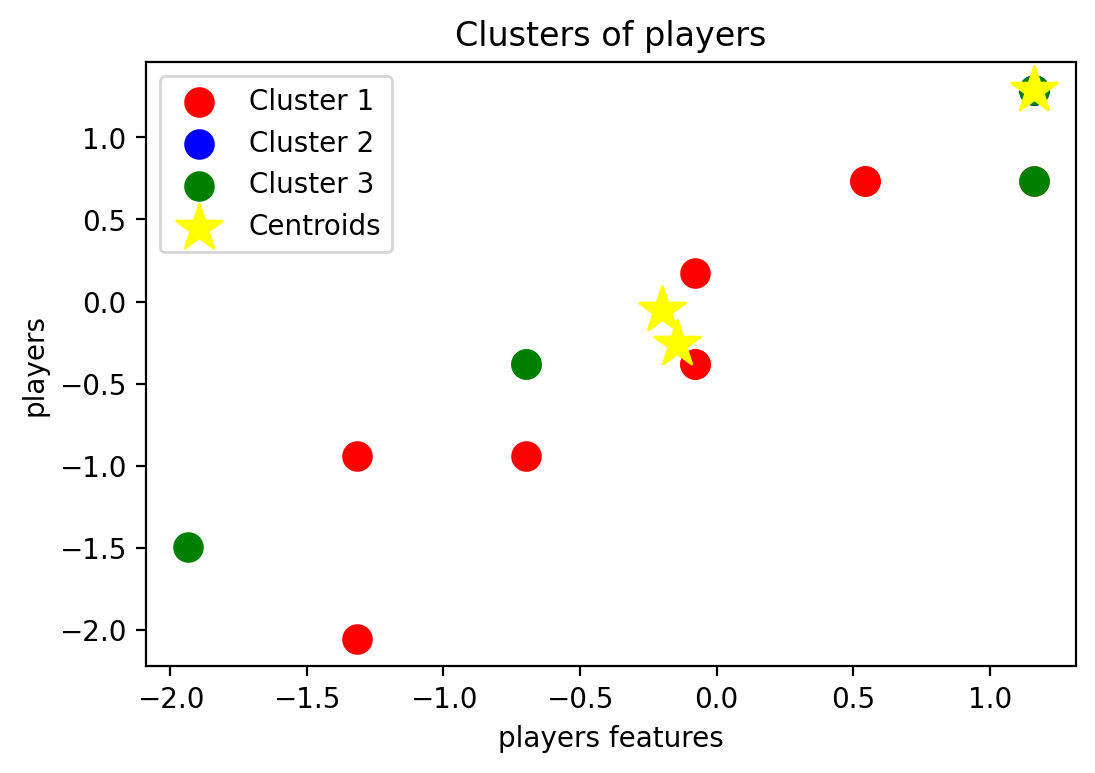

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
Ireland_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),4,3,0,45,29,15.00,69,65.21,0,...,134,2,1/45,67.00,7.11,56.5,0,0,2,0
1,A Balbirnie (IRE),6,6,0,228,113,38.00,264,86.36,1,...,-,-,-,-,-,-,-,-,3,0
2,C Campher (IRE),3,2,1,127,68,127.00,205,61.95,0,...,144,5,2/50,28.80,6.69,25.8,0,0,1,0
3,GJ Delany (IRE),5,5,0,67,22,13.40,100,67.00,0,...,74,1,1/29,74.00,7.40,60.0,0,0,1,0
4,JB Little (IRE),2,-,-,-,-,-,-,-,-,...,122,5,3/60,24.40,6.47,22.6,0,0,0,0
5,AR McBrine (IRE),6,5,1,101,40,25.25,129,78.29,0,...,268,6,2/37,44.66,5.58,48.0,0,0,0,0
6,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,71.92,0,...,126,4,2/28,31.50,5.36,35.2,0,0,2,0
7,JA McCollum (IRE),1,1,0,20,20,20.00,29,68.96,0,...,-,-,-,-,-,-,-,-,0,0
8,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,87.17,0,...,-,-,-,-,-,-,-,-,1,0
9,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,55.10,0,...,-,-,-,-,-,-,-,-,1,0


In [31]:
Ireland_2020["cluster"] = y_kmeans

In [32]:
Ireland_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),4,3,0,45,29,15.00,69,65.21,0,...,2,1/45,67.00,7.11,56.5,0,0,2,0,0
1,A Balbirnie (IRE),6,6,0,228,113,38.00,264,86.36,1,...,-,-,-,-,-,-,-,3,0,1
2,C Campher (IRE),3,2,1,127,68,127.00,205,61.95,0,...,5,2/50,28.80,6.69,25.8,0,0,1,0,0
3,GJ Delany (IRE),5,5,0,67,22,13.40,100,67.00,0,...,1,1/29,74.00,7.40,60.0,0,0,1,0,0
4,JB Little (IRE),2,-,-,-,-,-,-,-,-,...,5,3/60,24.40,6.47,22.6,0,0,0,0,0
5,AR McBrine (IRE),6,5,1,101,40,25.25,129,78.29,0,...,6,2/37,44.66,5.58,48.0,0,0,0,0,0
6,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,71.92,0,...,4,2/28,31.50,5.36,35.2,0,0,2,0,0
7,JA McCollum (IRE),1,1,0,20,20,20.00,29,68.96,0,...,-,-,-,-,-,-,-,0,0,2
8,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,87.17,0,...,-,-,-,-,-,-,-,1,0,2
9,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,55.10,0,...,-,-,-,-,-,-,-,1,0,2


In [33]:
Ireland_2020['cluster'].value_counts()

0    9
2    5
1    2
Name: cluster, dtype: int64

In [34]:
Ireland_Cluster_2020 = np.array([9,2,5])

In [35]:
Ireland_Cluster_2020

array([9, 2, 5])

In [36]:
%store Ireland_Cluster_2020

Stored 'Ireland_Cluster_2020' (ndarray)


In [37]:
Ireland_2020_players_scaled.insert(0, 'Player', Ireland_2020.Player)

In [38]:
Ireland_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MR Adair (IRE),-0.077382,-0.383436,-0.816497,-0.502102,-0.275187,-0.348661,-0.517871,0.067190,-0.377964,...,-0.674200,0.602007,-0.145865,1.879532,1.145363,1.506060,0.0,0.0,0.072023,0.0
1,A Balbirnie (IRE),1.160735,1.289739,-0.816497,2.220405,2.007848,0.460134,2.002813,1.067504,2.645751,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,0.456146,0.0
2,C Campher (IRE),-0.696441,-0.941161,0.816497,0.717819,0.784793,3.589822,1.240145,-0.086995,-0.377964,...,1.483240,0.717777,1.021055,0.267721,1.005191,0.131777,0.0,0.0,-0.312100,0.0
3,GJ Delany (IRE),0.541676,0.732014,-0.816497,-0.174806,-0.465440,-0.404925,-0.117147,0.151850,-0.377964,...,-0.674200,-0.092616,-0.534838,2.174890,1.242148,1.662737,0.0,0.0,-0.312100,0.0
4,JB Little (IRE),-1.315499,-2.056611,-0.816497,-1.171571,-1.063378,-0.876137,-1.409806,-3.016992,-0.377964,...,2.561959,0.463082,1.021055,0.082067,0.931768,-0.011471,0.0,0.0,-0.696223,0.0
5,AR McBrine (IRE),1.160735,0.732014,0.816497,0.331015,0.023782,0.011780,0.257724,0.685824,-0.377964,...,-0.674200,2.153331,1.410028,0.936918,0.634737,1.125558,0.0,0.0,-0.696223,0.0
6,BJ McCarthy (IRE),-0.077382,0.174289,0.816497,-0.561610,-0.601335,-0.395782,-0.672991,0.384547,-0.377964,...,1.483240,0.509390,0.632082,0.381645,0.561313,0.552567,0.0,0.0,0.072023,0.0
7,JA McCollum (IRE),-1.934558,-1.498886,-0.816497,-0.874029,-0.519798,-0.172836,-1.034935,0.244551,-0.377964,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.696223,0.0
8,KJ O'Brien (IRE),1.160735,1.289739,0.816497,0.345892,-0.220829,-0.158770,0.102605,1.105814,-0.377964,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.312100,0.0
9,WTS Porterfield (IRE),-0.696441,-0.383436,-0.816497,-0.368208,-0.275187,-0.243166,-0.143000,-0.410974,-0.377964,...,-0.674200,-0.949318,-0.923812,-0.947466,-1.227547,-1.023158,0.0,0.0,-0.312100,0.0


In [39]:
Ireland_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MR Adair (IRE),-0.348661,1.879532
1,A Balbirnie (IRE),0.460134,-0.947466
2,C Campher (IRE),3.589822,0.267721
3,GJ Delany (IRE),-0.404925,2.174890
4,JB Little (IRE),-0.876137,0.082067
5,AR McBrine (IRE),0.011780,0.936918
6,BJ McCarthy (IRE),-0.395782,0.381645
7,JA McCollum (IRE),-0.172836,-0.947466
8,KJ O'Brien (IRE),-0.158770,-0.947466
9,WTS Porterfield (IRE),-0.243166,-0.947466


In [40]:
Ireland_2020_Ave=Ireland_2020_players_scaled.mean()

In [41]:
Ireland_2020_Ave

Mat_x           3.989864e-17
Inns_x          4.163336e-17
NO              6.938894e-18
Runs_x         -2.081668e-17
HS             -2.775558e-17
Ave_x           2.428613e-17
BF             -1.387779e-17
SR_x           -2.706169e-16
100            -3.469447e-17
50              2.081668e-17
0               2.081668e-17
4s             -6.938894e-18
6s              1.387779e-17
Unnamed: 0_y    1.387779e-17
Mat_y           3.989864e-17
Inns_y         -2.081668e-17
Overs           2.775558e-17
Mdns            6.245005e-17
Runs_y          0.000000e+00
Wkts            0.000000e+00
Ave_y          -5.204170e-17
Econ            1.387779e-16
SR_y            2.081668e-17
4               0.000000e+00
5               0.000000e+00
Ct             -2.775558e-17
St              0.000000e+00
dtype: float64

In [42]:
Ireland_Ave_2020 =Ireland_2020_Ave[['Ave_x','Ave_y']]

In [43]:
Ireland_Ave_2020

Ave_x    2.428613e-17
Ave_y   -5.204170e-17
dtype: float64

In [44]:
Ireland_Ave_2020 = np.array([Ireland_Ave_2020.Ave_x, Ireland_Ave_2020.Ave_y])

In [45]:
Ireland_Ave_2020

array([ 2.42861287e-17, -5.20417043e-17])

In [46]:
%store Ireland_Ave_2020

Stored 'Ireland_Ave_2020' (ndarray)


In [47]:
Ireland_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MR Adair (IRE),4,3,0,45,29,15.00,69,65.21,0,...,2,1/45,67.00,7.11,56.5,0,0,2,0,0
1,A Balbirnie (IRE),6,6,0,228,113,38.00,264,86.36,1,...,-,-,-,-,-,-,-,3,0,1
2,C Campher (IRE),3,2,1,127,68,127.00,205,61.95,0,...,5,2/50,28.80,6.69,25.8,0,0,1,0,0
3,GJ Delany (IRE),5,5,0,67,22,13.40,100,67.00,0,...,1,1/29,74.00,7.40,60.0,0,0,1,0,0
4,JB Little (IRE),2,-,-,-,-,-,-,-,-,...,5,3/60,24.40,6.47,22.6,0,0,0,0,0
5,AR McBrine (IRE),6,5,1,101,40,25.25,129,78.29,0,...,6,2/37,44.66,5.58,48.0,0,0,0,0,0
6,BJ McCarthy (IRE),4,4,1,41,17*,13.66,57,71.92,0,...,4,2/28,31.50,5.36,35.2,0,0,2,0,0
7,JA McCollum (IRE),1,1,0,20,20,20.00,29,68.96,0,...,-,-,-,-,-,-,-,0,0,2
8,KJ O'Brien (IRE),6,6,1,102,31,20.40,117,87.17,0,...,-,-,-,-,-,-,-,1,0,2
9,WTS Porterfield (IRE),3,3,0,54,29,18.00,98,55.10,0,...,-,-,-,-,-,-,-,1,0,2
